# Project: Car Price Prediction using Image Processing and Machine Learning

## Machine Learning 

# Aim: Prediction of Car Prices

# Introduction

In this part of the project, we implemented several supervised Machine Learning algorithms to build models that distinguish between
the prices of different cars. We will analyze these algorithms to choose the best cars available in the market at best price. Our goal with this implementation is to accurately predict used car prices as per the parameters like Kms driven and so on.

# Why we chose python?

Python, which is a great compromise between practicality (with handy data format and manipulation) and scalability (much
easier to implement for large scale, automated computation than R, Octave or Matlab). More precisely, Python 3.5.1 with the
Anaconda distribution 2.4.0, I personally use the Spyder environment but feel free to keep your favorite tools. Especially
Jupiter Notebooks are really convenient to work in team, we also used Github.

# Libraries and packages

1)  numpy 1.10.1: providing key data format, mathematical manipulation techniques.\
2)  pandas 0.17.1: for advanced data format, high-level manipulation and visualization.\
3)  pyplot from matplotlib 1.5.0: for basic visualization.\
4)  seaborn: to do some data visualization

# Importing the libraries

In [91]:
import numpy as np
import pandas as pd

# Importing dataset 

In [92]:
data = pd.read_csv("car_price_data2.csv")

In [93]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [94]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [95]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [96]:
data.shape

(301, 9)

In [97]:
for col in data[['Fuel_Type','Seller_Type','Transmission']]:
    print(data[col].value_counts())
    print()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64



### Creating a new feature called total no. of years (Car_age), bcz It's important to know how many years old the car is.

In [98]:
data['Car_age'] = 2023-data['Year']

### It's time to drop the Year column after we get to know the age of the vehicle

In [99]:
data.drop(labels='Year',axis=1,inplace=True)

# Check the presence of missing values

In [100]:
data.isnull().sum()

Car_Name         0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Car_age          0
dtype: int64

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Car_age        301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [102]:
data.describe(include = 'all')

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
count,301,301.000000,301.000000,301.000000,301,301,301,301.000000,301.000000
unique,98,NaN,NaN,NaN,3,2,2,NaN,NaN
top,city,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN,NaN
freq,26,NaN,NaN,NaN,239,195,261,NaN,NaN
mean,NaN,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189,9.372093
std,NaN,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915,2.891554
min,NaN,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000,5.000000
25%,NaN,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000,7.000000
50%,NaN,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000,9.000000
75%,NaN,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000,11.000000


### Uniques Values of Data

In [103]:
print("Different Fuel Types:",data['Fuel_Type'].unique())
print()
print("Different Seller Types:",data['Seller_Type'].unique())
print()
print("Different Transmission Types:",data['Transmission'].unique())
print()
print("Different Car Names:",data['Car_Name'].unique())

Different Fuel Types: ['Petrol' 'Diesel' 'CNG']

Different Seller Types: ['Dealer' 'Individual']

Different Transmission Types: ['Manual' 'Automatic']

Different Car Names: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 

# Size of dataset

In [104]:
rows = len(data)
print("Total number of records:", rows)

Total number of records: 301


# Visualisation of the data to check if Machine Learning is relevant


### Import matplotlib and seaborn library

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

###  Visualization of Data

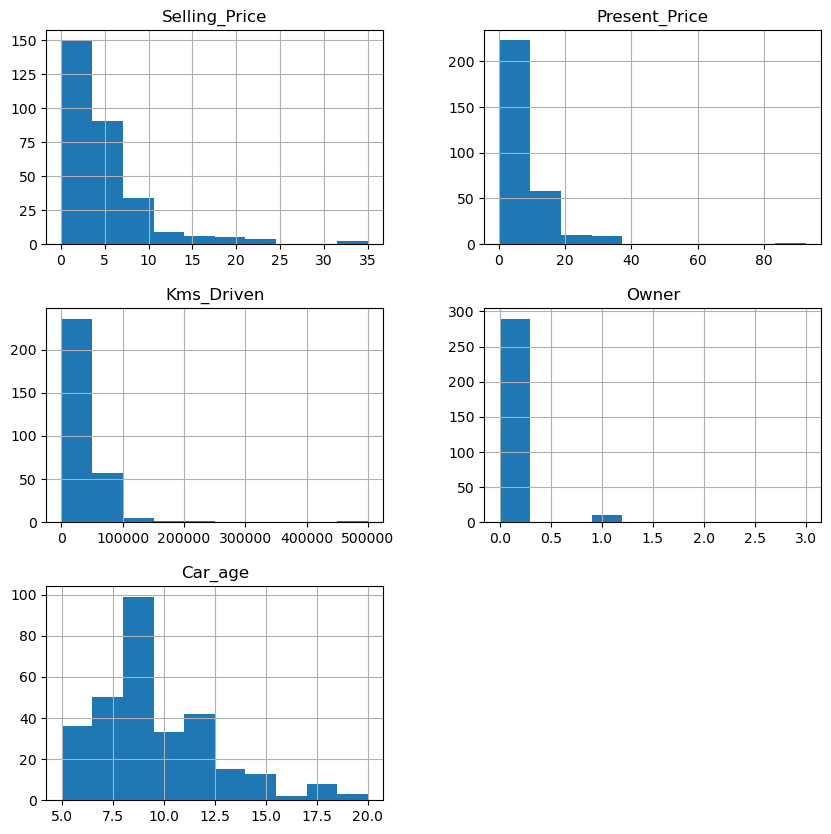

In [106]:
data.hist(figsize = (10,10))
plt.show()

C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


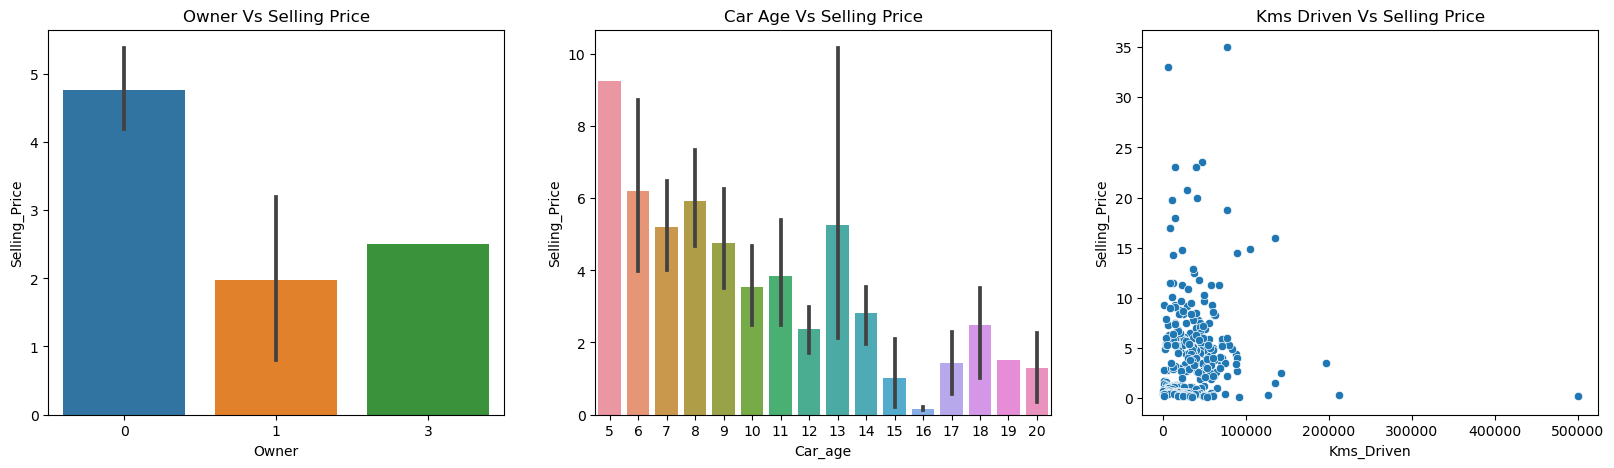

In [107]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.barplot(data['Owner'],data['Selling_Price'])
plt.title('Owner Vs Selling Price')

plt.subplot(1,3,2)
sns.barplot(data['Car_age'],data['Selling_Price'])
plt.title('Car Age Vs Selling Price')

plt.subplot(1,3,3)
sns.scatterplot(data['Kms_Driven'],data['Selling_Price'])
plt.title('Kms Driven Vs Selling Price')
plt.show()

1) Selling Price is high with less Owners used Cars

2) Selling Price of cars 5 years old would be high and gradually decreases with car of 20 years old

3) Lesser the Kms driven higher the Selling Price

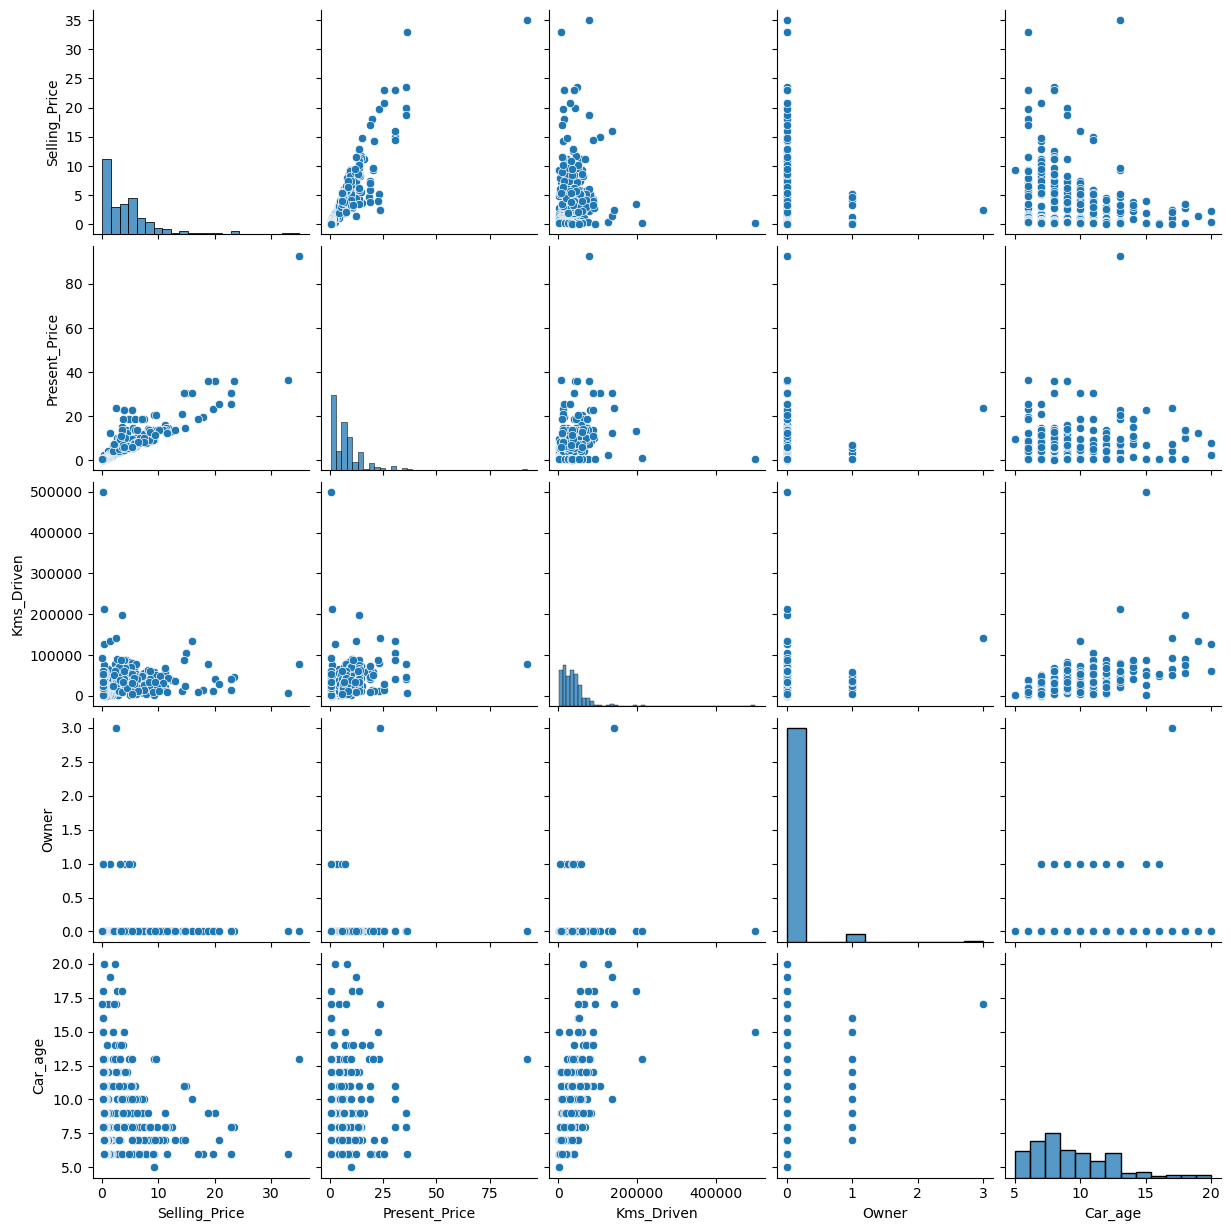

In [108]:
sns.pairplot(data)

* Representing data in relation with each other.

C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


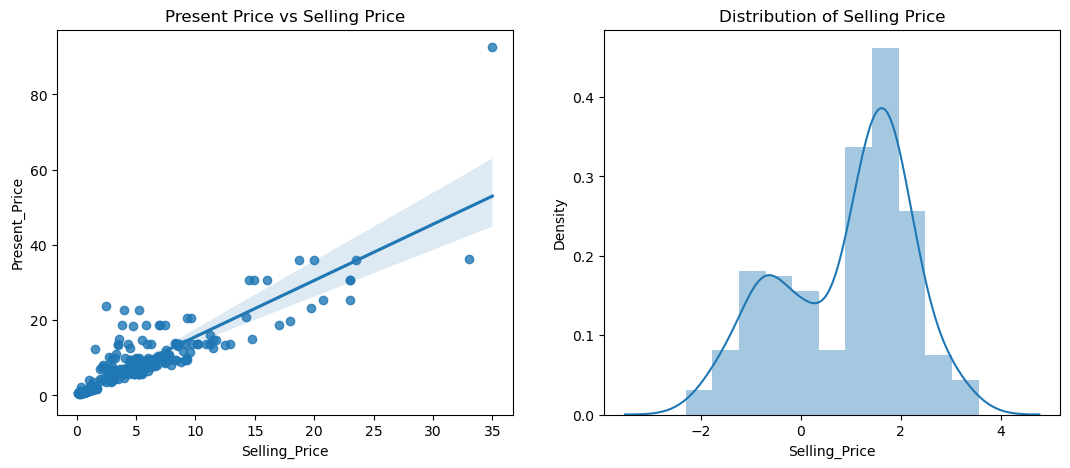

In [109]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.regplot(data['Selling_Price'],data['Present_Price'])
plt.title('Present Price vs Selling Price')
plt.subplot(1,3,2)
sns.distplot(np.log(data['Selling_Price']))
plt.title('Distribution of Selling Price')
plt.show()

* Selling Price of the cars increase with Present Price

Text(0.5, 1.0, 'Present Price vs Selling Price')

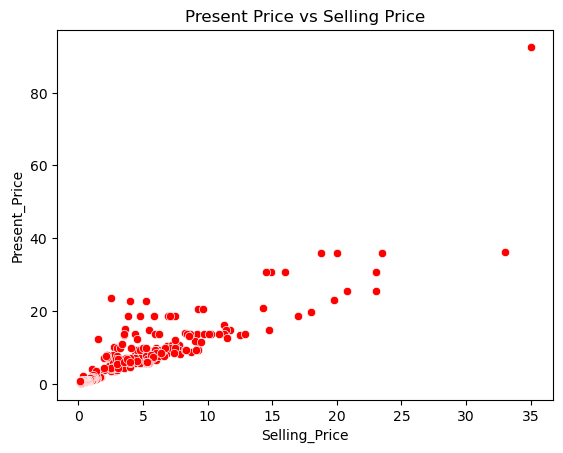

In [110]:
sns.scatterplot(x='Selling_Price', y='Present_Price', data=data,color='red')
plt.title('Present Price vs Selling Price')

Text(0.5, 1.0, 'Seller Type vs Selling Price')

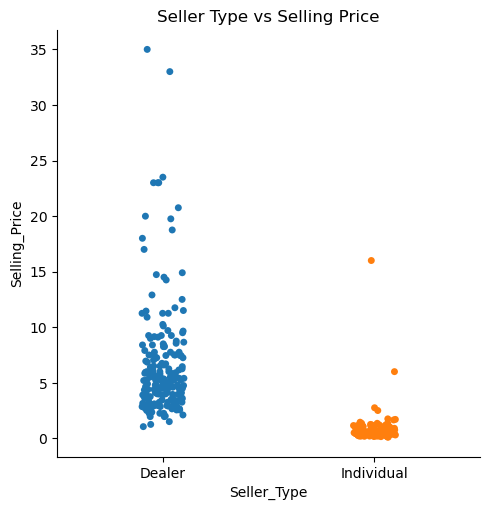

In [111]:
sns.catplot(x='Seller_Type', y='Selling_Price', data=data)
plt.title('Seller Type vs Selling Price')

* This shows more people are buying cars which are valued at less than 10 Lakhs.

Text(0.5, 1.0, 'Kms Driven vs Fuel Type')

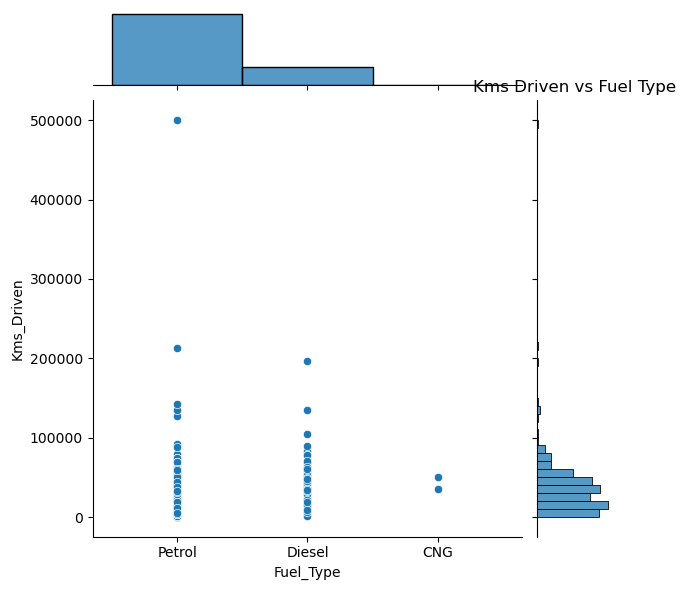

In [112]:
sns.jointplot(x='Fuel_Type', y='Kms_Driven', data=data)
plt.title('Kms Driven vs Fuel Type')

* Petrol and Diesel fuel type cars are almost equally driven whereas CNG cars are less driven.

Text(0.5, 1.0, 'Present Price vs Selling Price')

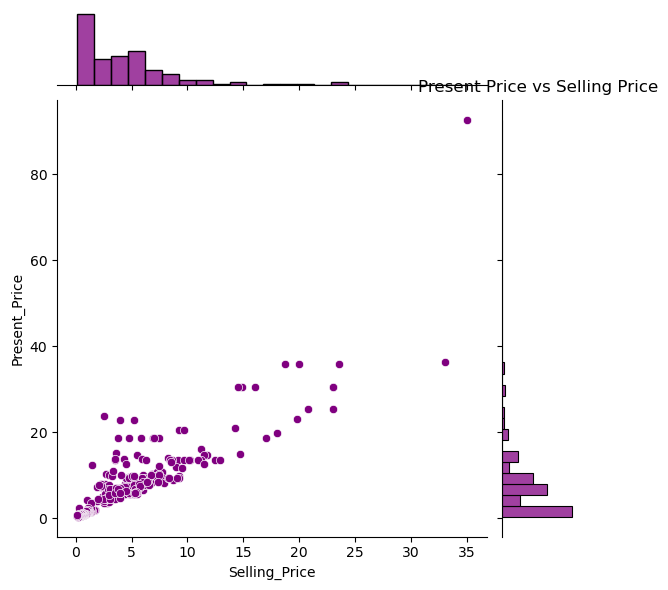

In [113]:
sns.jointplot(x='Selling_Price', y='Present_Price', data=data,color='purple')
plt.title('Present Price vs Selling Price')

Text(0.5, 1.0, 'Car Age vs Selling Price')

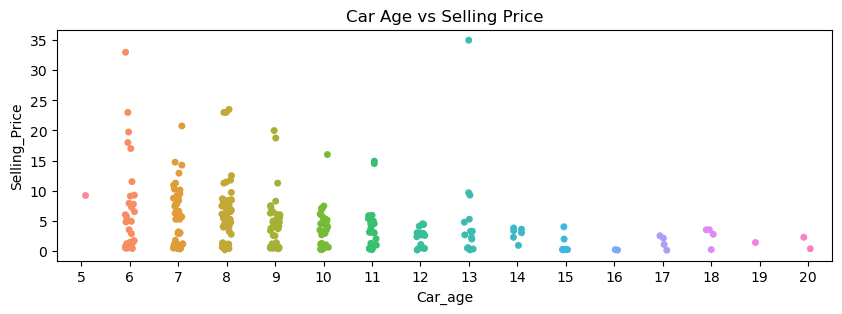

In [114]:
plt.figure(figsize=[10,3])
sns.stripplot(x="Car_age", y="Selling_Price", data=data)
plt.title('Car Age vs Selling Price')

* As the Car grows old the Selling Price of it keeps on decreasing as shown in the graph.

C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transmission')

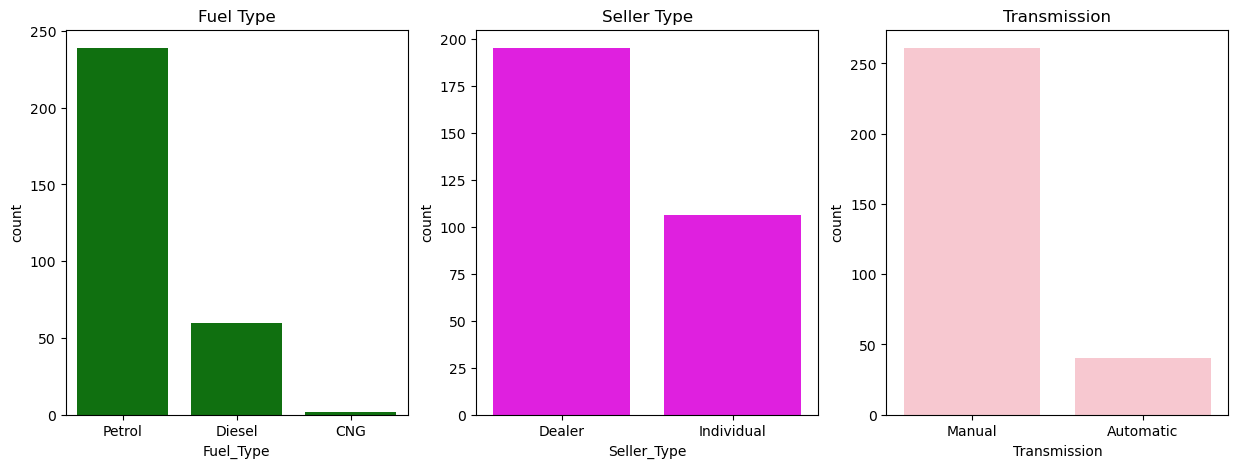

In [115]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.countplot(data['Fuel_Type'], color='green')
plt.title('Fuel Type')
plt.subplot(1,3,2)
sns.countplot(x='Seller_Type', data=data, color='magenta')
plt.title('Seller Type')
plt.subplot(1,3,3)
sns.countplot(data['Transmission'], color='pink')
plt.title('Transmission')

* These Graphs represent the count for specific parameter like number of petrol, diesel, CNG cars and then how many cars the dealer and individual seller are selling. 

Text(0.5, 1.0, 'Selling Price vs Fuel Type')

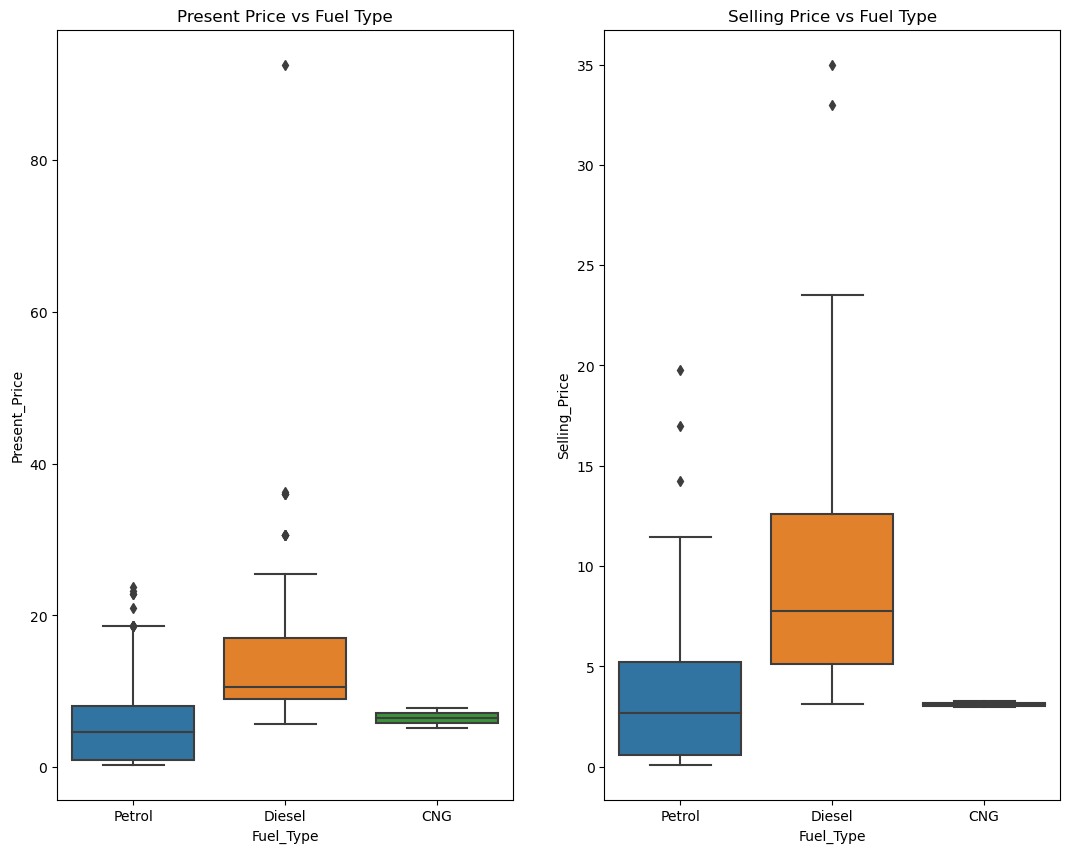

In [116]:
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
sns.boxplot(x='Fuel_Type', y='Present_Price', data=data)
plt.title('Present Price vs Fuel Type')
plt.subplot(1,3,2)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Selling Price vs Fuel Type')

Text(0.5, 1.0, 'Present Price vs Selling Price')

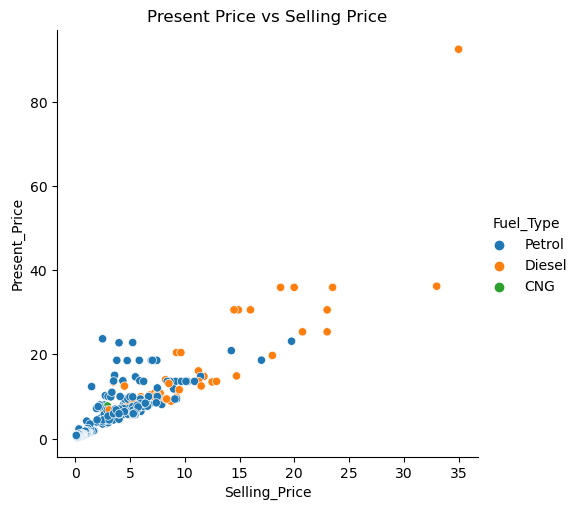

In [117]:
sns.relplot(x='Selling_Price', y='Present_Price', data=data, hue="Fuel_Type")
plt.title('Present Price vs Selling Price')

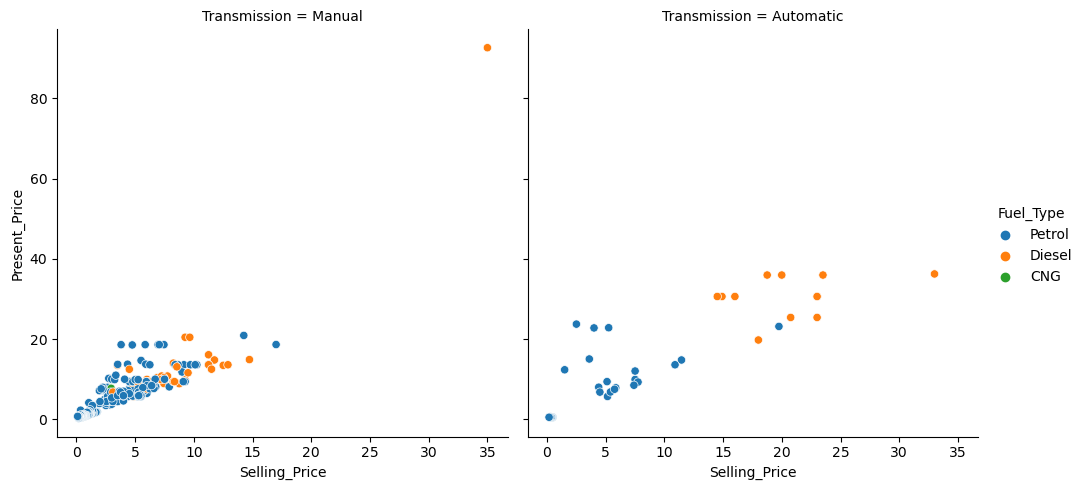

In [118]:
sns.relplot(x='Selling_Price', y='Present_Price', data=data, hue="Fuel_Type", col="Transmission")

C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Selling Price Vs Fuel Type')

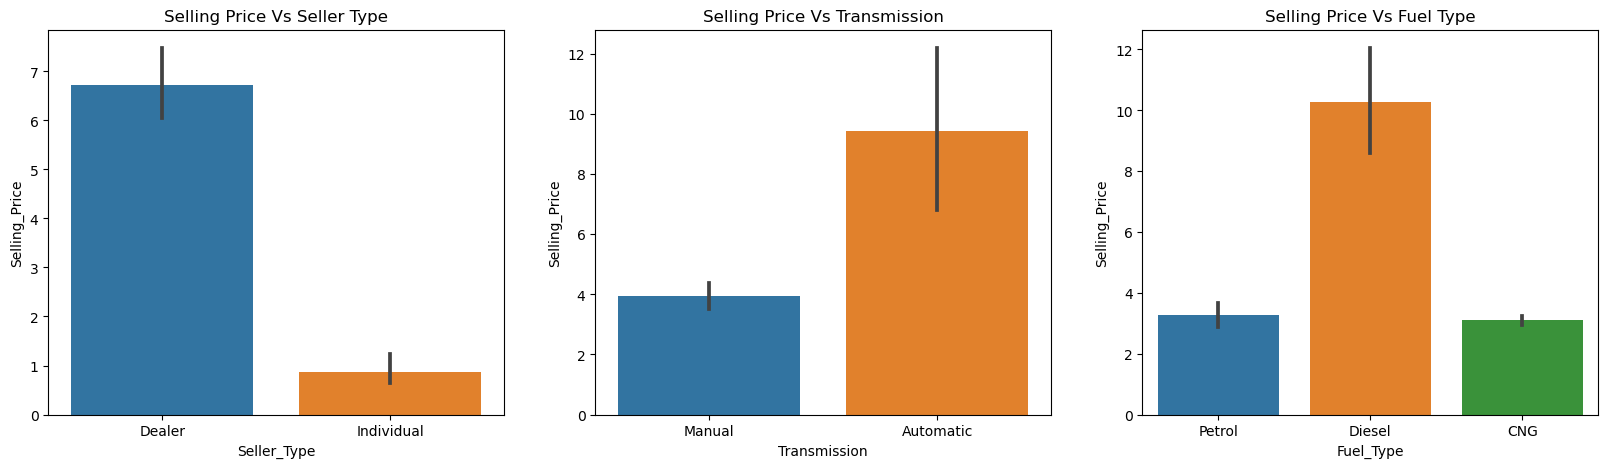

In [119]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.barplot(data['Seller_Type'], data['Selling_Price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(data['Transmission'],data['Selling_Price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(data['Fuel_Type'],data['Selling_Price'])
plt.title('Selling Price Vs Fuel Type')

* Dealer sells the cars at higher price
* Automatic cars are expensive.
* Diesel fuel cars are costlier than others

Text(0.5, 1.0, 'Present Price Vs Transmission')

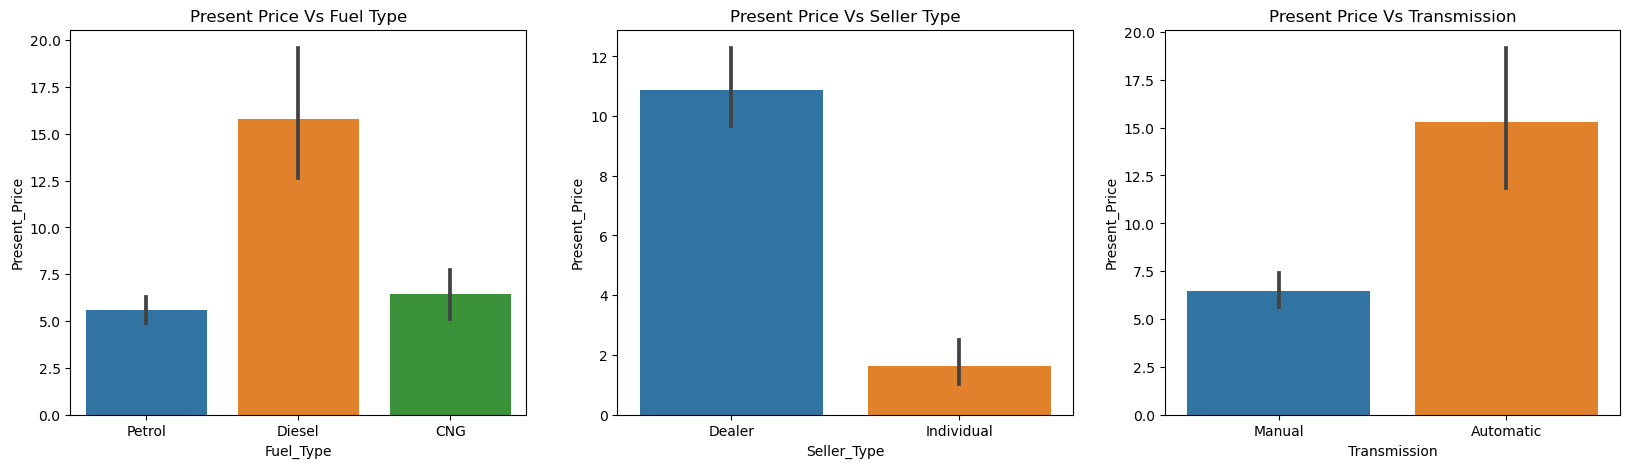

In [120]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.barplot(x="Fuel_Type", y="Present_Price", data=data)
plt.title('Present Price Vs Fuel Type')
plt.subplot(1,3,2)
sns.barplot(x="Seller_Type", y="Present_Price", data=data)
plt.title('Present Price Vs Seller Type')
plt.subplot(1,3,3)
sns.barplot(x="Transmission", y="Present_Price", data=data)
plt.title('Present Price Vs Transmission')

<AxesSubplot:>

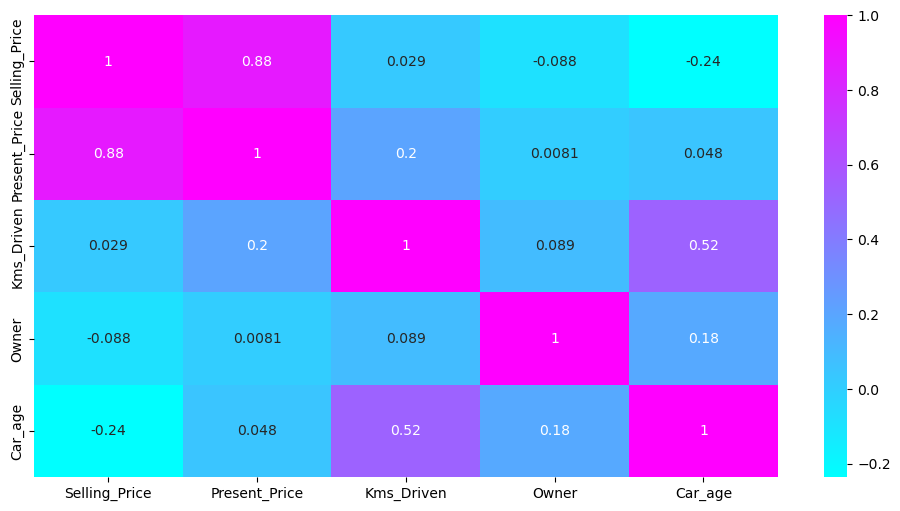

In [121]:
data_corr = data.corr()
index = data_corr.index
plt.figure(figsize = (12,6))
sns.heatmap(data[index].corr(),annot = True,cmap = 'cool')

In [122]:
values= data['Car_Name'].unique()
print(values)

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

#### There are ninety eight unique names In Car_Name column. 

#### This is something very difficult to do and a regression that would mean over 98 mods, so we'll leave that column.


In [123]:
data = data.drop(labels='Car_Name', axis=1)

In [124]:
# Dealing With Categorical Variables, creating dummie
data = pd.get_dummies(data,drop_first=True)
data

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,1,0,0,1
297,4.00,5.90,60000,0,8,0,1,0,1
298,3.35,11.00,87934,0,14,0,1,0,1
299,11.50,12.50,9000,0,6,1,0,0,1


### Declaring dependent variable(Y) and independent variable(X)


In [125]:
X = data.iloc[:,1:]
Y = data.iloc[:,:1]

In [126]:
print(X.shape)
print(Y.shape)

(301, 8)
(301, 1)


### Scaling the data and checking all normalization

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Present_Price','Car_age']])

StandardScaler()

In [128]:
input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

In [129]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

## Splitting the data

#### Now the dataset is scaled and normalized, we will now split the data into training and test sets. We will use 20% of the dataset to test the model we are building and 80% will be used for training it.

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2, random_state=365)

In [131]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 240 samples.
Testing set has 61 samples.


## Training Machine Learning methods and testing their accuracy

### Linear Regression Model

In [132]:
# Model Creation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, mean_absolute_error

In [133]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [134]:
# slope/reg coef --m
m=lr.coef_
m
a1=m[0,0]
a2=m[0,1]
a3=m[0,2]
a4=m[0,3]
a5=m[0,4]
a6=m[0,5]
a7=m[0,6]
a8=m[0,7]
print("a1-->",a1)
print("a2-->",a2)
print("a3-->",a3)
print("a4-->",a4)
print("a5-->",a5)
print("a6-->",a6)
print("a7-->",a7)
print("a8-->",a8)

a1--> 4.4914848492706545
a2--> -1.067013124120285
a3--> -4.548760716760469e-06
a4--> 0.490823202557463
a5--> 2.0948042886238167
a6--> 0.3627664019922676
a7--> -0.37770499898306054
a8--> -0.7230503417604593


In [135]:
a0=lr.intercept_
a0

array([4.88116555])

In [136]:
Y_pred = lr.predict(X_test)
Y_pred

array([[11.25360029],
       [ 4.00390498],
       [ 3.36942901],
       [ 0.49429677],
       [ 4.07702985],
       [-0.89111632],
       [ 7.95259177],
       [ 3.89606296],
       [-0.39590777],
       [ 1.54177195],
       [ 6.13679416],
       [ 1.7484247 ],
       [21.50428622],
       [ 0.85334223],
       [19.2622731 ],
       [11.45883776],
       [ 2.16566326],
       [ 4.67743095],
       [ 6.40680761],
       [ 4.16506624],
       [ 7.60193918],
       [ 6.62107417],
       [-0.41324773],
       [ 1.19484852],
       [-0.88360112],
       [ 1.2176205 ],
       [ 7.35436601],
       [ 6.8452763 ],
       [48.78190659],
       [14.51872566],
       [ 6.69030778],
       [ 2.08533321],
       [-0.80890497],
       [ 4.17211187],
       [ 8.57957369],
       [ 4.67209376],
       [ 3.23469869],
       [ 5.30551842],
       [ 1.67946272],
       [ 7.69406879],
       [ 3.25345969],
       [ 1.81477457],
       [ 9.99385243],
       [ 0.42960899],
       [17.93050955],
       [ 4

In [137]:
# Model Summary
r_squared = r2_score(Y_test,Y_pred)
print("R_squared is:",r_squared)

R_squared is: 0.834434156692127


In [138]:
lr.score(X_train,Y_train)

0.8752370320721932

In [139]:
accuracy1 = lr.score(X_test,Y_test)
accuracy1

0.834434156692127

In [140]:
MSE_lr = mean_squared_error(Y_test, Y_pred)
print("Mean sqaured error is:",MSE_lr)
MAE_lr = mean_absolute_error(Y_test, Y_pred)
print("Mean absolute error is:",MAE_lr)

Mean sqaured error is: 7.451321328328289
Mean absolute error is: 1.6127233595675754


In [141]:
print("Mean Accuracy of the model : ",round(accuracies.mean()*100,1),"%")

Mean Accuracy of the model :  83.4 %


In [142]:
data={'MethodName':[],'MeanAccuracy':[],'MSE':[],'MAE':[]}
data_result=pd.DataFrame(data)

In [143]:
data_result

,MethodName,MeanAccuracy,MSE,MAE


In [144]:
data_result = data_result.append({'MethodName':"Linear Regression",'MeanAccuracy':round(accuracy1.mean()*100,1),\
                                  'MSE':round(MSE_lr,1),'MAE':round(MAE_lr,1)},ignore_index=True)

C:\Users\vibhu\AppData\Local\Temp\ipykernel_40844\1189022098.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_result = data_result.append({'MethodName':"Linear Regression",'MeanAccuracy':round(accuracy1.mean()*100,1),\


In [145]:
data_result

,MethodName,MeanAccuracy,MSE,MAE
0,Linear Regression,83.4,7.5,1.6


### Random Forest Regressor Model

In [146]:
#Model Creation
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(X_train,Y_train)

C:\Users\vibhu\AppData\Local\Temp\ipykernel_40844\3958723425.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,Y_train)


RandomForestRegressor(n_estimators=300, random_state=0)

In [147]:
Y_pred=regressor.predict(X_test)
Y_pred

array([ 5.78856667,  5.01383333,  2.9295    ,  1.12913333,  4.502     ,
        0.37383333,  9.60033333,  5.1175    ,  0.4771    ,  0.7684    ,
        6.5525    ,  1.1575    , 19.84456667,  0.51766667, 20.64466667,
       13.44786667,  1.54133333,  4.6685    ,  5.67016667,  3.1205    ,
        4.4225    ,  8.15063333,  0.4521    ,  0.3174    ,  0.3951    ,
        0.32616667,  6.22183333,  5.60186667, 21.10186667, 15.94153333,
        6.4595    ,  2.73866667,  1.12646667,  4.43836667,  7.77963333,
        5.04483333,  3.2745    ,  6.2245    ,  0.90426667,  7.47746667,
        4.00633333,  1.15456667,  9.63993333,  1.18753333, 16.51476667,
        5.19833333,  7.44473333,  7.80603333,  9.5718    ,  4.82636667,
        0.26996667,  0.7124    ,  7.16096667, 20.64466667,  5.21633333,
        4.567     ,  3.89693333,  7.1325    ,  0.46653333, 11.5299    ,
        5.71666667])

In [148]:
# Model Summary
r_squared = r2_score(Y_test,Y_pred)
print("R_squared :",r_squared)

R_squared : 0.89443975238963


In [149]:
regressor.score(X_train,Y_train)

0.9915637256612826

In [150]:
accuracy2 = regressor.score(X_test,Y_test)
accuracy2

0.89443975238963

In [151]:
MSE_rf = mean_squared_error(Y_test, Y_pred)
print("Mean sqaured error is:",MSE_rf)
MAE_rf = mean_absolute_error(Y_test, Y_pred)
print("Mean absolute error is:",MAE_rf)

Mean sqaured error is: 4.750758421712228
Mean absolute error is: 1.017501639344264


In [152]:
print("Mean Accuracy of the model : ",round(accuracy.mean()*100,1),"%")

Mean Accuracy of the model :  81.3 %


In [153]:
data_result = data_result.append({'MethodName':"Random Forest",'MeanAccuracy':round(accuracy2.mean()*100,1),\
                                  'MSE':round(MSE_rf,1),'MAE':round(MAE_rf,1)},ignore_index=True)

C:\Users\vibhu\AppData\Local\Temp\ipykernel_40844\2999645527.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_result = data_result.append({'MethodName':"Random Forest",'MeanAccuracy':round(accuracy2.mean()*100,1),\


In [154]:
data_result

,MethodName,MeanAccuracy,MSE,MAE
0,Linear Regression,83.4,7.5,1.6
1,Random Forest,89.4,4.8,1.0


### KNN Regressor Model

In [155]:
# Model Creation
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5,p=2)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [156]:
Y_pred=knn.predict(X_test)
Y_pred

array([[6.57 ],
       [1.846],
       [3.69 ],
       [7.1  ],
       [4.332],
       [1.46 ],
       [4.65 ],
       [7.9  ],
       [8.23 ],
       [0.73 ],
       [6.16 ],
       [3.112],
       [3.478],
       [4.38 ],
       [4.89 ],
       [2.924],
       [1.866],
       [6.24 ],
       [5.04 ],
       [3.29 ],
       [5.97 ],
       [3.86 ],
       [0.742],
       [4.98 ],
       [4.58 ],
       [4.67 ],
       [8.49 ],
       [4.41 ],
       [3.478],
       [3.632],
       [4.37 ],
       [3.77 ],
       [4.89 ],
       [2.076],
       [6.3  ],
       [5.02 ],
       [7.9  ],
       [1.902],
       [2.69 ],
       [5.02 ],
       [7.1  ],
       [4.8  ],
       [2.924],
       [2.374],
       [3.29 ],
       [3.   ],
       [4.682],
       [1.46 ],
       [0.906],
       [1.322],
       [4.38 ],
       [5.984],
       [2.18 ],
       [4.89 ],
       [1.11 ],
       [4.12 ],
       [5.4  ],
       [5.08 ],
       [2.61 ],
       [1.256],
       [3.78 ]])

In [157]:
# Model Summary
r_squared = r2_score(Y_test,Y_pred)
print("R_squared :",r_squared)

R_squared : -0.25285907327123525


In [158]:
knn.score(X_train,Y_train)

0.30794814109415725

In [159]:
accuracy3 = knn.score(X_test,Y_test)
accuracy3

-0.25285907327123525

In [160]:
MSE_kr = mean_squared_error(Y_test, Y_pred)
print("Mean sqaured error is:",MSE_kr)
MAE_kr = mean_absolute_error(Y_test, Y_pred)
print("Mean absolute error is:",MAE_kr)

Mean sqaured error is: 56.3851537704918
Mean absolute error is: 4.921868852459016


In [161]:
print("Mean Accuracy of the model : ",round(accuracy.mean()*100,1),"%")

Mean Accuracy of the model :  81.3 %


In [162]:
data_result = data_result.append({'MethodName':"KNN Regressor",'MeanAccuracy':round(accuracy3.mean()*100,1),\
                                  'MSE':round(MSE_kr,1),'MAE':round(MAE_kr,1)},ignore_index=True)

C:\Users\vibhu\AppData\Local\Temp\ipykernel_40844\3007242272.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_result = data_result.append({'MethodName':"KNN Regressor",'MeanAccuracy':round(accuracy3.mean()*100,1),\


In [163]:
data_result

,MethodName,MeanAccuracy,MSE,MAE
0,Linear Regression,83.4,7.5,1.6
1,Random Forest,89.4,4.8,1.0
2,KNN Regressor,-25.3,56.4,4.9


### Decision Tree Regressor Model

In [164]:
# Model Creation
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(random_state = 0)
DTR.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [165]:
# predictions
Y_pred=DTR.predict(X_test)
Y_pred

array([ 4.  ,  5.3 ,  2.  ,  1.1 ,  4.4 ,  0.42,  8.4 ,  5.25,  0.45,
        0.9 ,  5.95,  1.15, 14.9 ,  0.42, 23.5 , 18.  ,  1.65,  4.5 ,
        5.5 ,  3.49,  4.75,  9.1 ,  0.45,  0.25,  0.45,  0.35,  6.45,
        7.45, 14.9 , 18.  ,  6.  ,  2.7 ,  1.1 ,  4.4 ,  7.75,  4.85,
        4.  ,  6.6 ,  1.05,  6.5 ,  4.75,  1.11,  8.55,  1.25, 14.9 ,
        5.3 ,  5.95,  7.25,  9.15,  4.95,  0.25,  0.75,  4.75, 23.5 ,
        5.3 ,  4.75,  4.4 ,  4.75,  0.48, 12.9 ,  5.8 ])

In [166]:
# Model Summary
r_squared = r2_score(Y_test,Y_pred)
print("R_squared :",r_squared)

R_squared : 0.812671090652976


In [167]:
DTR.score(X_train,Y_train)

1.0

In [168]:
accuracy4 = DTR.score(X_test,Y_test)
accuracy4

0.812671090652976

In [169]:
MSE_dt = mean_squared_error(Y_test, Y_pred)
print("Mean sqaured error is:",MSE_dt)
MAE_dt = mean_absolute_error(Y_test, Y_pred)
print("Mean absolute error is:",MAE_dt)

Mean sqaured error is: 8.430772131147542
Mean absolute error is: 1.1332786885245898


In [170]:
print("Mean Accuracy of the model : ",round(accuracy.mean()*100,1),"%")

Mean Accuracy of the model :  81.3 %


In [171]:
data_result = data_result.append({'MethodName':"Decision Tree",'MeanAccuracy':round(accuracy4.mean()*100,1),\
                                  'MSE':round(MSE_dt,1),'MAE':round(MAE_dt,1)},ignore_index=True)

C:\Users\vibhu\AppData\Local\Temp\ipykernel_40844\3451029503.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_result = data_result.append({'MethodName':"Decision Tree",'MeanAccuracy':round(accuracy4.mean()*100,1),\


In [172]:
data_result

,MethodName,MeanAccuracy,MSE,MAE
0,Linear Regression,83.4,7.5,1.6
1,Random Forest,89.4,4.8,1.0
2,KNN Regressor,-25.3,56.4,4.9
3,Decision Tree,81.3,8.4,1.1


C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MethodName', ylabel='MeanAccuracy'>

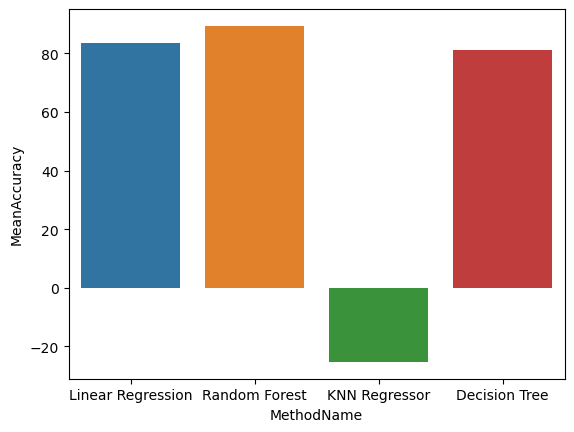

In [173]:
sns.barplot(data_result['MethodName'],data_result['MeanAccuracy'])

C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MethodName', ylabel='MSE'>

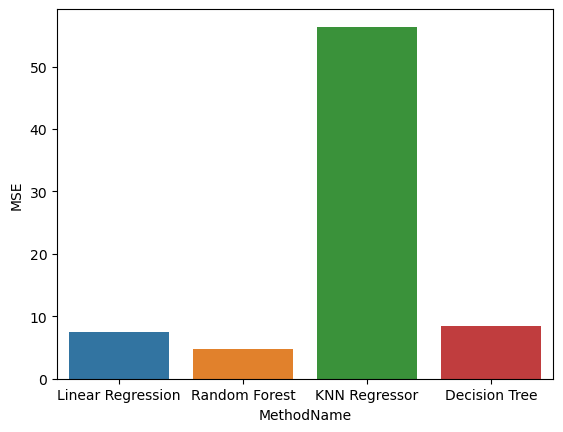

In [174]:
sns.barplot(data_result['MethodName'],data_result['MSE'])

C:\Users\vibhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MethodName', ylabel='MAE'>

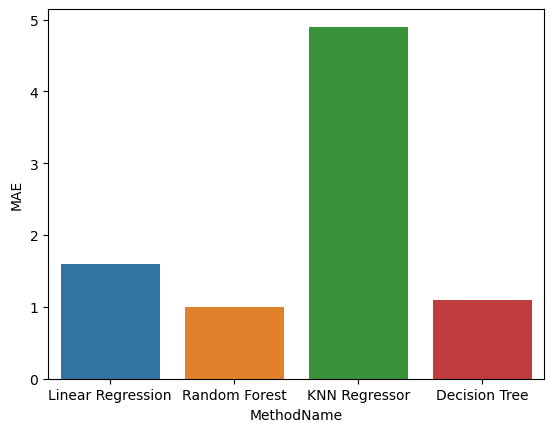

In [175]:
sns.barplot(data_result['MethodName'],data_result['MAE'])

## So as we have  tried  different Regression Alorithms we found that "Random Forest Regressor Model" is giving the best accuracy as compared to other models.


## Conclusions

* Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
* As the Car is getting older or Car_Age increases the Selling Price goes down for the same.
* Cars with Fuel_Type Diesel have a higher Selling Price.
* Automatic Transmission type cars are higher priced whereas Manual type are always priced less.
* Cars sold by Individual tend to get less Selling Price as compared to that sold by Dealers.